<a href="https://colab.research.google.com/github/nhamhung/Coder-School-Machine-Learning/blob/master/MLE_9_7_Lyrics_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-07-16 06:42:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-07-16 06:42:35 (142 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



**Here is a sample of Irish lyrics (Lanigan's Ball):**

![alt text](https://i.imgur.com/oVOO7GR.png)

In [ ]:
tokenizer = Tokenizer()

# it is stored in one single string
data = open('/tmp/irish-lyrics-eof.txt').read()

# split new line to break it into different sentences
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)

# I'm using OOV (Out of Vocab) so I need to add 1 here (also this will help to pad the sentences with 0 token)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
# we are turning this into training data by turning the sentence into list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	# we are generating n-gram from the token list above
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

This is what happens in the first loop above:

![alt text](https://i.imgur.com/Gw4NuAb.png)

This is what happens in the second loop above (generate n-gram):

![alt text](https://i.imgur.com/pQicRUK.png)

In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

This is what happens after you pad the sequences:

![alt text](https://i.imgur.com/PWKk5ku.png)

In [ ]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

Now we can have a pair of each train sample and label sample for each row from above padded input sequences:

![alt text](https://i.imgur.com/ldYNc7x.png)

![alt text](https://i.imgur.com/4ughjzG.png)

![alt text](https://i.imgur.com/0RRsDAg.png)

In [ ]:
# this will convert the label into one hot encode
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

![alt text](https://i.imgur.com/tK2R9ne.png)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [ ]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
model = Sequential()

# input_length we need to minus 1 here because we take one out to become the label
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 4s 10ms/step - loss: 6.6366 - accuracy: 0.0763
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 5.7483 - accuracy: 0.1157
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 4.8564 - accuracy: 0.1691
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 3.9434 - accuracy: 0.2365
Epoch 5/100
377/377 [==============================] - 4s 9ms/step - loss: 3.0735 - accuracy: 0.3494
Epoch 6/100
377/377 [==============================] - 4s 9ms/step - loss: 2.4034 - accuracy: 0.4551
Epoch 7/100
377/377 [==============================] - 4s 10ms/step - loss: 1.8999 - accuracy: 0.5536
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.5632 - accuracy: 0.6335
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 1.2816 - accuracy: 0.6931
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 1.1102 -

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

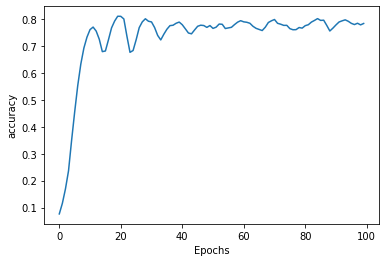

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this young boy in the month of may your more love hat crazy hat is gone sure gone love gone right gone gone oer the gone by your hat gone alas gone high gone alas i like right into gone i gone a call devonshire hat in carriages two hat and gone i love gallon gone had gone gone by your gone i gone your gone i gone my around to love gleam i love gone your gone i gone your gone i gone my gone gone gone gone gone i gone oer her brothers gone oer the wealth of great


Nice! We can generate lyrics now which is cool and it actually sounds cool enough !!!

Here is another example:

![alt text](https://i.imgur.com/BsRgC9X.png)